# EDA 1

In [1]:
# Importing external libraries
from pandas import DataFrame # Data loading for analysis.
from typing import Dict # Dict type for the query_results method
from pathlib import Path # For dealing with paths independetly of the platform and creating files

In [2]:
# Make environment
from src.data.make_env import main as make_env
make_env()

# Load env variables
from dotenv import dotenv_values
env_vars = dotenv_values()

OrderedDict({'DATASET_ROOT_PATH': 'C:\\Users\\David\\Documents\\Github Repos\\SEpsilon\\SEpsilon-Proyectos\\Data Science\\E-commerceSiteRevenueAnalysis\\e-commerce_site_revenue_analysis\\data\\raw\\', 'QUERIES_ROOT_PATH': 'C:\\Users\\David\\Documents\\Github Repos\\SEpsilon\\SEpsilon-Proyectos\\Data Science\\E-commerceSiteRevenueAnalysis\\e-commerce_site_revenue_analysis\\src\\queries\\', 'QUERY_RESULTS_ROOT_PATH': 'C:\\Users\\David\\Documents\\Github Repos\\SEpsilon\\SEpsilon-Proyectos\\Data Science\\E-commerceSiteRevenueAnalysis\\e-commerce_site_revenue_analysis\\src\\tests\\query_results\\', 'PUBLIC_HOLIDAYS_URL': 'https://date.nager.at/api/v3/publicholidays', 'SQLITE_BD_ABSOLUTE_PATH': 'C:\\Users\\David\\Documents\\Github Repos\\SEpsilon\\SEpsilon-Proyectos\\Data Science\\E-commerceSiteRevenueAnalysis\\e-commerce_site_revenue_analysis\\data\\processed\\list.db'})


In [3]:
# Make dataset (Extract and Load)
from src.data.make_dataset import main as make_dataset
input_filepath = "src/data/make_dataset.py" 
output_filepath = "data/raw data/processed"

db_engine = make_dataset(input_filepath, output_filepath, True)

2024-10-15 11:29:11,259 - src.data.make_dataset - INFO - making final data set from raw data
2024-10-15 11:29:11,260 - src.data.make_dataset - INFO - Extracting data into dataframes
c:\Users\David\Documents\Github Repos\SEpsilon\SEpsilon-Proyectos\Data Science\E-commerceSiteRevenueAnalysis\e-commerce_site_revenue_analysis\src\data\extract.py:20: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data = read_json(response.text)
2024-10-15 11:29:41,697 - src.data.make_dataset - INFO - Done!
2024-10-15 11:29:41,697 - src.data.make_dataset - INFO - Loading DataFrames to Data Warehouse in SQLite


OLIST_CUSTOMERS_DATASET
OLIST_GEOLOCATION
OLIST_ORDER_ITEMS
OLIST_ORDER_PAYMENTS
OLIST_ORDER_REVIEWS
OLIST_ORDERS
OLIST_PRODUCTS


2024-10-15 11:30:03,334 - src.data.make_dataset - INFO - Done!
2024-10-15 11:30:03,335 - src.data.make_dataset - INFO - return_engine=True, returning DB Engine...


OLIST_SELLERS
PRODUCT_CATEGORY_NAME_TRANSLATION
public_holidays


# Queries

In [4]:
# Create instance of QueriesTransform
from src.data.transform import QueriesTransform
queries_transform = QueriesTransform(db_engine, env_vars["QUERIES_ROOT_PATH"])
queries_results = queries_transform.get_queries_results()

2024-10-15 11:30:03,422 - src.data.transform - INFO - Loading query: delivery_date_difference
2024-10-15 11:30:05,056 - src.data.transform - INFO - Loading query: global_ammount_order_status
2024-10-15 11:30:05,159 - src.data.transform - INFO - Loading query: revenue_by_month_year
2024-10-15 11:30:06,985 - src.data.transform - INFO - Loading query: revenue_per_state
2024-10-15 11:30:09,992 - src.data.transform - INFO - Loading query: top_10_least_revenue_categories
2024-10-15 11:30:13,991 - src.data.transform - INFO - Loading query: top_10_revenue_categories
2024-10-15 11:30:17,923 - src.data.transform - INFO - Loading query: real_vs_estimated_delivered_time
2024-10-15 11:30:18,559 - src.data.transform - INFO - Loading query: orders_per_day_and_holidays_2017
2024-10-15 11:30:18,773 - src.data.transform - INFO - Loading query: get_freight_value_weight_relationship


In [5]:
# Freight value weight relationship
freight_value_weight_relationship = queries_results["get_freight_value_weight_relationship"]
freight_value_weight_relationship

,order_id,freight_value,product_weight_g
0,00010242fe8c5a6d1ba2dd792cb16214,13.29,650.0
1,00018f77f2f0320c557190d7a144bdd3,19.93,30000.0
2,000229ec398224ef6ca0657da4fc703e,17.87,3050.0
3,00024acbcdf0a6daa1e931b038114c75,12.79,200.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,18.14,3750.0
...,...,...,...
96473,fffc94f6ce00a00581880bf54a75a037,43.41,10150.0
96474,fffcd46ef2263f404302a634eb57f7eb,36.53,8950.0
96475,fffce4705a9662cd70adb13d4a31832d,16.95,967.0
96476,fffe18544ffabc95dfada21779c9644f,8.72,100.0


In [6]:
# Global amount order status
global_ammount_order_status = queries_results["global_ammount_order_status"]
global_ammount_order_status

,order_status,Ammount
0,approved,2
1,canceled,625
2,created,5
3,delivered,96478
4,invoiced,314
5,processing,301
6,shipped,1107
7,unavailable,609


In [7]:
# Real vs Predicted delivered time
real_vs_estimated_delivered_time = queries_results["real_vs_estimated_delivered_time"]
real_vs_estimated_delivered_time

,month_no,month,Year2016_real_time,Year2017_real_time,Year2018_real_time,Year2016_estimated_time,Year2017_estimated_time,Year2018_estimated_time
0,01,Jan,NaN,12.647044,14.080563,NaN,39.508831,26.302555
1,02,Feb,NaN,13.168825,16.945138,NaN,31.848929,24.528996
2,03,Mar,NaN,12.951184,16.301410,NaN,24.732386,22.033067
3,04,Apr,NaN,14.917913,11.499241,NaN,27.349810,23.679546
4,05,May,NaN,11.322363,11.419029,NaN,24.284784,22.891488
5,06,Jun,NaN,12.011573,9.239216,NaN,24.021864,27.772740
6,07,Jul,NaN,11.592732,8.958636,NaN,23.317316,19.690127
7,08,Aug,NaN,11.147125,7.732780,NaN,23.480603,15.186330
8,09,Sep,54.813194,11.851007,NaN,18.488449,22.437366,NaN
9,10,Oct,19.600559,11.856700,NaN,55.676632,23.019536,NaN


In [8]:
# Revenue by month-year
revenue_by_month_year = queries_results["revenue_by_month_year"]
revenue_by_month_year

,month_no,month,Year2016,Year2017,Year2018
0,01,Jan,0.00,37632.57,969967.80
1,02,Feb,0.00,222270.75,853616.82
2,03,Mar,0.00,376833.72,1024851.95
3,04,Apr,0.00,299798.45,1274742.18
4,05,May,0.00,579280.43,1150528.93
5,06,Jun,0.00,489463.42,1141543.85
6,07,Jul,0.00,518115.19,925958.79
7,08,Aug,0.00,609180.34,1319737.66
8,09,Sep,0.00,652576.48,12875.18
9,10,Oct,34116.28,740570.40,347.95


In [9]:
# Revenue per state
revenue_per_state = queries_results["revenue_per_state"]
revenue_per_state

,customer_state,Revenue
0,SP,5769081.27
1,RJ,2055690.45
2,MG,1819277.61
3,RS,861608.40
4,PR,781919.55
5,SC,595208.40
6,BA,591270.60
7,DF,346146.17
8,GO,334294.22
9,ES,317682.65


In [10]:
# Top 10 least revenue categories
top_10_least_revenue_categories = queries_results["top_10_least_revenue_categories"]
top_10_least_revenue_categories

,Category,Num_order,Revenue
0,security_and_services,2,324.51
1,fashion_childrens_clothes,7,718.98
2,cds_dvds_musicals,12,1199.43
3,home_comfort_2,24,1710.54
4,flowers,29,2213.01
5,arts_and_craftmanship,23,2326.17
6,la_cuisine,13,2913.53
7,fashion_sport,26,3605.83
8,diapers_and_hygiene,25,4126.17
9,fashio_female_clothing,36,4902.67


In [11]:
# Top 10 revenue categories
top_10_revenue_categories = queries_results["top_10_revenue_categories"]
top_10_revenue_categories

,Category,Num_order,Revenue
0,bed_bath_table,9272,1692714.28
1,health_beauty,8646,1620684.04
2,computers_accessories,6529,1549252.47
3,furniture_decor,6307,1394466.93
4,watches_gifts,5493,1387046.31
5,sports_leisure,7529,1349252.93
6,housewares,5743,1069787.97
7,auto,3809,833610.84
8,garden_tools,3448,810614.93
9,cool_stuff,3559,744649.32


In [12]:
# Delivery date difference
delivery_date_difference = queries_results["delivery_date_difference"]
delivery_date_difference

,State,Delivery_Difference
0,AL,8
1,MA,9
2,BA,10
3,CE,10
4,ES,10
5,SE,10
6,MS,11
7,PI,11
8,RJ,11
9,SC,11


In [13]:
# Order amount per day with holidays
orders_per_day_and_holidays_2017 = queries_results["orders_per_day_and_holidays_2017"]
orders_per_day_and_holidays_2017

,order_day,order_count,is_holiday
0,2017/11/24,1176.0,No
1,2017/11/25,499.0,No
2,2017/11/27,403.0,No
3,2017/11/26,391.0,No
4,2017/11/28,380.0,No
...,...,...,...
357,2017/01/08,6.0,No
358,2017/01/09,5.0,No
359,2017/01/07,4.0,No
360,2017/01/06,4.0,No


# Plots

In [15]:
from src.visualization.visualize import (
    plot_freight_value_weight_relationship,
    plot_global_amount_order_status,
    plot_real_vs_predicted_delivered_time,
    plot_revenue_by_month_year,
    plot_revenue_per_state,
    plot_top_10_least_revenue_categories,
    plot_top_10_revenue_categories,
    plot_delivery_date_difference,
    plot_order_amount_per_day_with_holidays
)

### Revenue by month-year

2024-10-15 11:30:22,479 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-10-15 11:30:22,485 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-10-15 11:30:22,552 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-10-15 11:30:22,558 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-10-15 11:30:22,

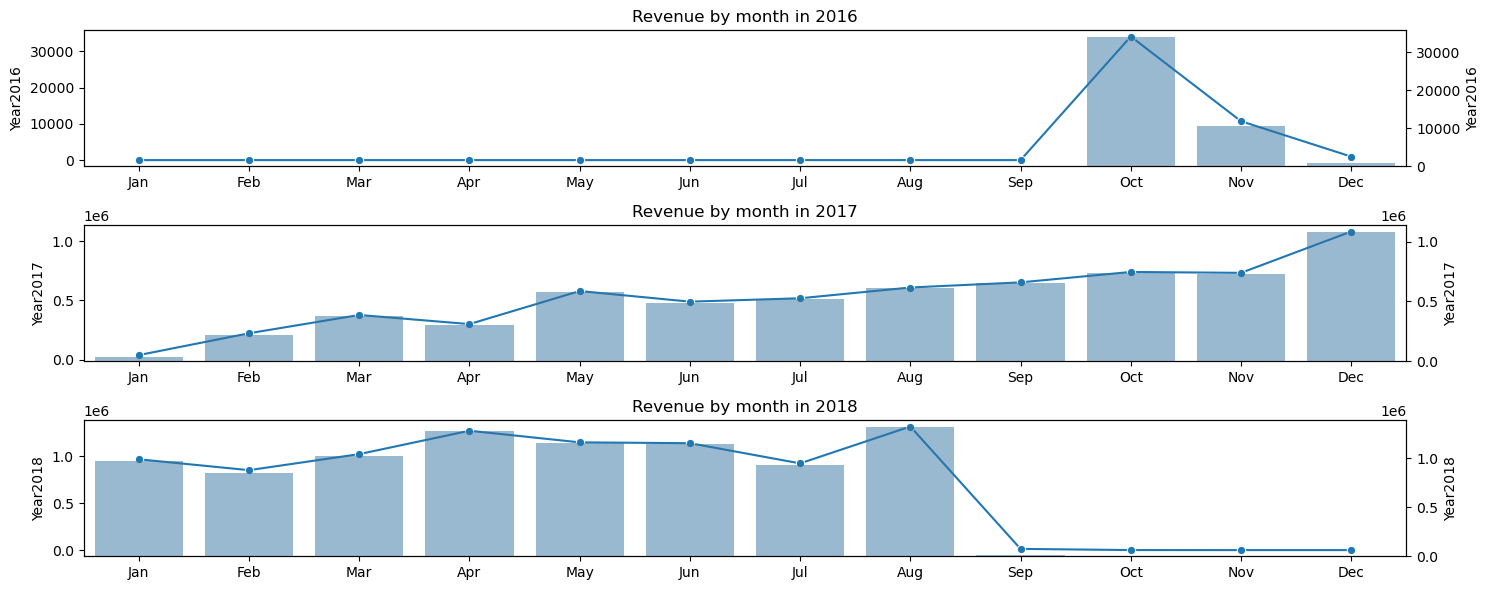

In [16]:
plot_revenue_by_month_year(revenue_by_month_year)

### Top 10 revenue categories

In [17]:
plot_top_10_revenue_categories(top_10_revenue_categories)

### Top 10 least revenue categories

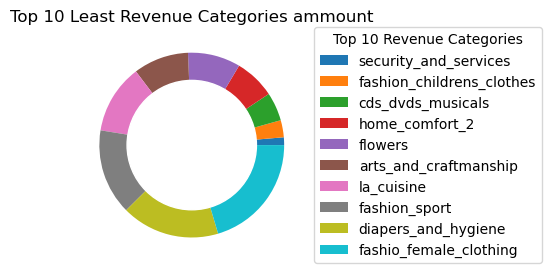

In [18]:
plot_top_10_least_revenue_categories(top_10_least_revenue_categories)

### Revenue per state

In [19]:
plot_revenue_per_state(revenue_per_state)

### Delivery date difference

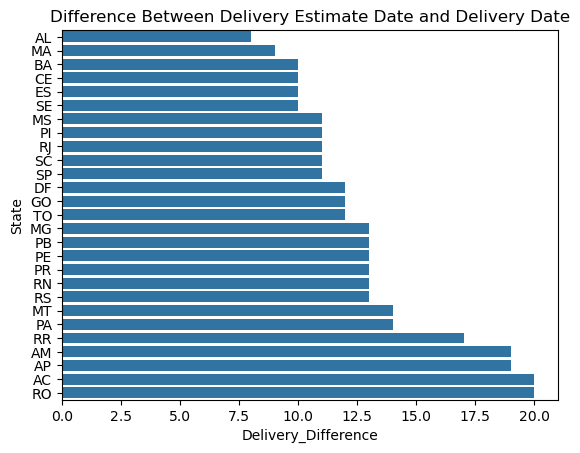

In [20]:
plot_delivery_date_difference(delivery_date_difference)

### Real vs Predicted delivered time

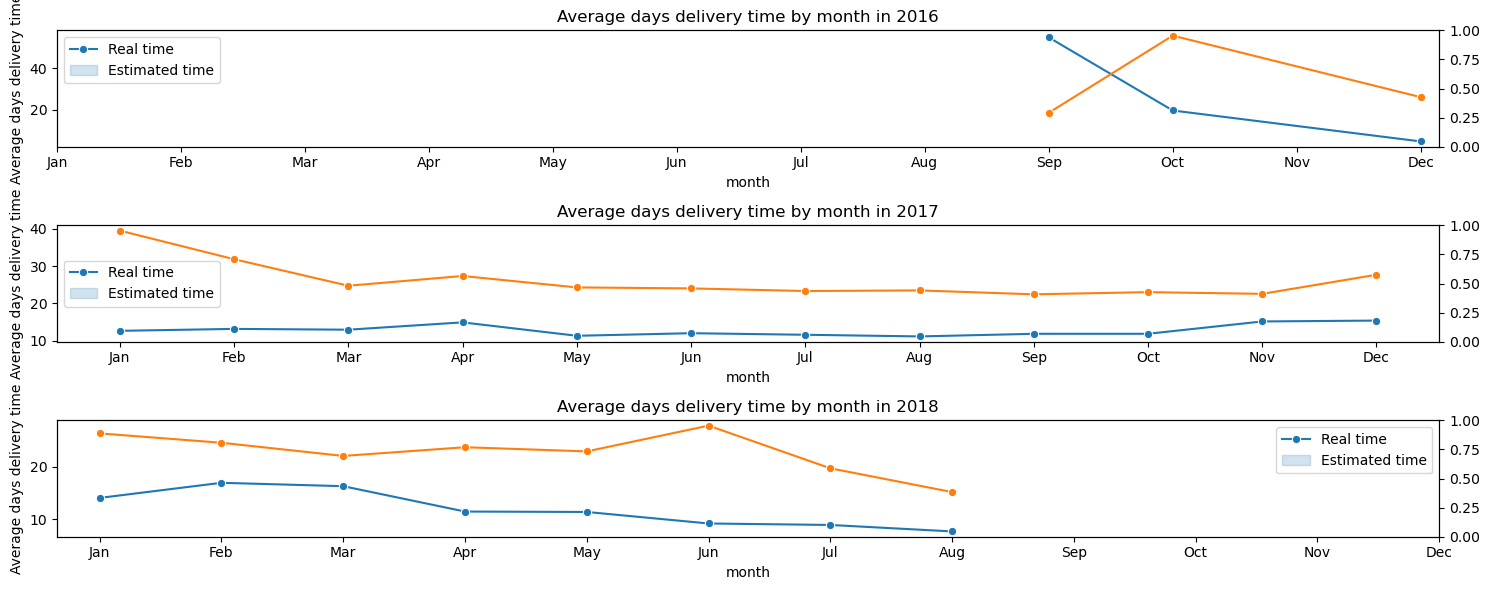

In [21]:
plot_real_vs_predicted_delivered_time(real_vs_estimated_delivered_time)

### Global amount order status

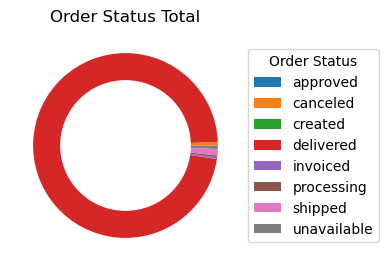

In [22]:
plot_global_amount_order_status(global_ammount_order_status)

### Order amount per day with holidays

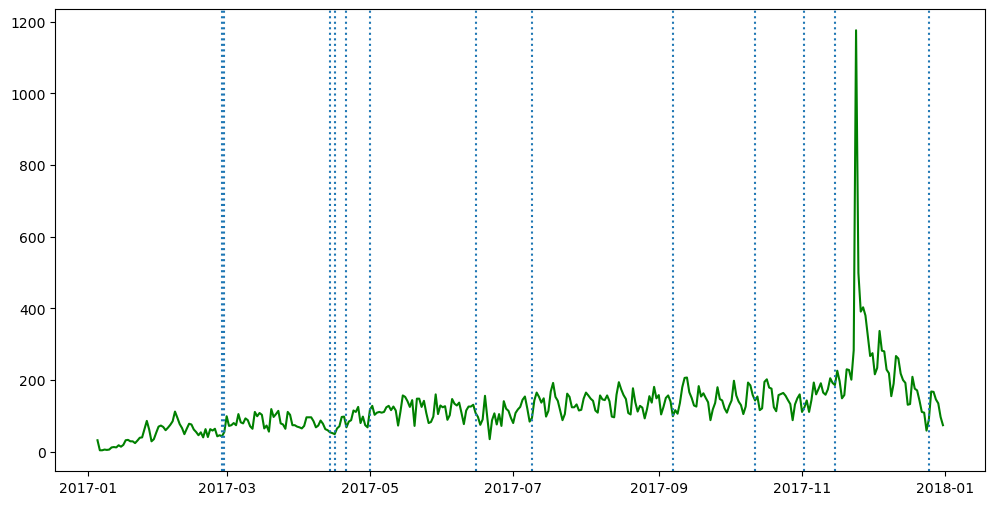

In [23]:
holidays_data = orders_per_day_and_holidays_2017[orders_per_day_and_holidays_2017["is_holiday"] == "Yes"].dropna()
plot_order_amount_per_day_with_holidays(orders_per_day_and_holidays_2017, holidays_data)
#holidays_data

### Freight value - weight relationship

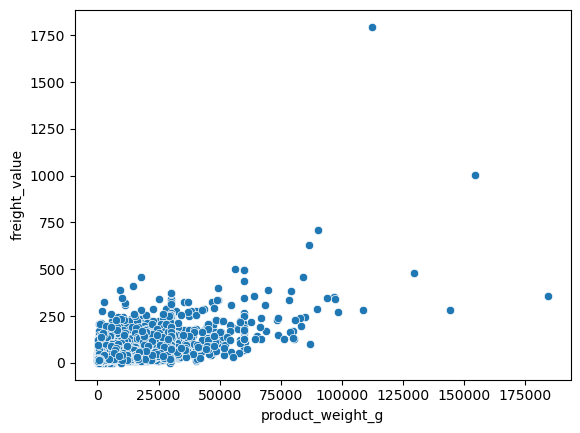

In [24]:
plot_freight_value_weight_relationship(freight_value_weight_relationship)

In [28]:
freight_value_weight_relationship.iloc[:, 1:].corr()

,freight_value,product_weight_g
freight_value,1.000000,0.640093
product_weight_g,0.640093,1.000000
